<a href="https://colab.research.google.com/github/sharansumbad/Econimics_Research_project/blob/master/Julia_FADs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img src="https://github.com/JuliaLang/julia-logo-graphics/raw/master/images/julia-logo-color.png" height="100" /> _Colab Notebook Template_

## Instructions
1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. If you need a GPU: _Runtime_ > _Change runtime type_ > _Harware accelerator_ = _GPU_.
3. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia and other packages (if needed, update `JULIA_VERSION` and the other parameters). This takes a couple of minutes.
4. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the next section.

_Notes_:
* If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2, 3 and 4.
* After installation, if you want to change the Julia version or activate/deactivate the GPU, you will need to reset the Runtime: _Runtime_ > _Factory reset runtime_ and repeat steps 3 and 4.

In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.6.0" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools Plots"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -n "$COLAB_GPU" ] && [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  if [ "$COLAB_GPU" = "1" ]; then
      JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia  

  echo ''
  echo "Success! Please reload this page and jump to the next section."
fi

Installing Julia 1.6.0 on the current Colab Runtime...
2021-10-07 13:22:34 URL:https://julialang-s3.julialang.org/bin/linux/x64/1.6/julia-1.6.0-linux-x86_64.tar.gz [112838927/112838927] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing Julia package BenchmarkTools...
Installing Julia package Plots...
Installing IJulia kernel...
[ Info: Installing julia kernelspec in /root/.local/share/jupyter/kernels/julia-1.6

Success! Please reload this page and jump to the next section.


# Checking the Installation
The `versioninfo()` function should print your Julia version and some other info about the system:

In [ ]:
versioninfo()

Julia Version 1.6.0
Commit f9720dc2eb (2021-03-24 12:55 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-11.0.1 (ORCJIT, broadwell)
Environment:
  JULIA_NUM_THREADS = 2


In [ ]:
using BenchmarkTools
M = rand(2048, 2048)
@benchmark M^2

BenchmarkTools.Trial: 10 samples with 1 evaluation.
 Range (min … max):  517.078 ms … 667.082 ms  ┊ GC (min … max): 0.00% … 19.82%
 Time  (median):     527.465 ms               ┊ GC (median):    0.10%
 Time  (mean ± σ):   542.045 ms ±  45.052 ms  ┊ GC (mean ± σ):  3.03% ±  6.21%

  ▃   █                                                          
  █▇▁▇█▁▁▁▇▁▁▁▁▇▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▇ ▁
  517 ms           Histogram: frequency by time          667 ms <

 Memory estimate: 32.00 MiB, allocs estimate: 2.

In [ ]:
if ENV["COLAB_GPU"] == "1"
    using CUDA

    M_gpu = cu(M)
    @benchmark CUDA.@sync M_gpu^2
else
    println("No GPU found.")
end

No GPU found.


https://juliastats.org/Distributions.jl/v0.14/univariate.html

https://cheatsheets.quantecon.org/

https://juliastats.org/Distributions.jl/stable/univariate/#Distributions.TDist

In [ ]:
import Pkg; 
Pkg.add("Distributions");
Pkg.add("LinearAlgebra");
Pkg.add("Statistics");
Pkg.add("Compat")
Pkg.add("StaticArrays")
Pkg.add("Plots")
using Distributions,LinearAlgebra, Statistics, Compat, StaticArrays, Plots

    Updating registry at `~/.julia/registries/General`
   Resolving package versions...
   Installed StatsFuns ─────────── v0.9.12
   Installed Rmath_jll ─────────── v0.3.0+0
   Installed OpenSpecFun_jll ───── v0.5.5+0
   Installed Rmath ─────────────── v0.7.0
   Installed QuadGK ────────────── v2.4.2
   Installed LogExpFunctions ───── v0.3.3
   Installed FillArrays ────────── v0.12.6
   Installed Distributions ─────── v0.25.18
   Installed PDMats ────────────── v0.11.1
   Installed IrrationalConstants ─ v0.1.0
   Installed SpecialFunctions ──── v1.7.0
   Installed DocStringExtensions ─ v0.8.5
   Installed ChainRulesCore ────── v1.7.2
    Updating `~/.julia/environments/v1.6/Project.toml`
  [31c24e10] + Distributions v0.25.18
    Updating `~/.julia/environments/v1.6/Manifest.toml`
  [d360d2e6] + ChainRulesCore v1.7.2
  [31c24e10] + Distributions v0.25.18
  [ffbed154] + DocStringExtensions v0.8.5
  [1a297f60] + FillArrays v0.12.6
  [92d709cd] + IrrationalConstants v0.1.0
  [2ab3a3ac] + 

In [ ]:
@time begin

function simulate_wi(v,I,mu,sd) 
  d = Normal(mu,sd)
  wi = collect(rand(d,v) for n in 1:I)
  return wi
end

function simulate_wi_t(v,I,df) 
  t = TDist(df)
  wi = collect(rand(t,v) for n in 1:I)
  return wi
end

function epsilon_gen(v , u , sigma) 
  t = Normal(0,1)
  epsilon = [collect(rand(t,v))]
  return epsilon
end

function Sum(wi,epi)
  w =[] 
  for i in 1:size(wi,1) 
    x = [wi[i]] + epi 
    append!( w , x ) 
    end
   return w  
end

end

  0.000201 seconds (1.12 k allocations: 82.782 KiB, 1632.31% compilation time)


Sum (generic function with 1 method)

In [ ]:
@time begin
Epsilon = epsilon_gen(5, 0, 1)
end

  0.000011 seconds (3 allocations: 352 bytes)


1-element Vector{Vector{Float64}}:
 [1.7529931428928995, 0.7691906740560805, -1.8602116721113333, -0.5582234335897972, 0.007380485591805917]

#Change Distribution of W 

In [ ]:
@time begin
 k = simulate_wi(5, 10000, 0 , 10)
end

  0.001539 seconds (10.00 k allocations: 1.297 MiB)


10000-element Vector{Vector{Float64}}:
 [14.25672198534799, -18.647750116389904, 13.299402961165125, -11.283900925504259, 7.047942597069641]
 [-6.096693441384837, 9.853904492773031, -0.22950095164626466, -9.662838074823183, -4.726548190638396]
 [7.886436497499577, -7.956073007581658, 15.804888354701705, -15.05650048494612, 14.147796636234592]
 [2.3978512476957112, 7.103218510971891, -0.08973345923385458, 6.1365385073923715, -3.7030849171017852]
 [6.776381053003307, 4.246421228807122, -28.903352017145476, 3.0854299671853957, 4.328938345883715]
 [-7.010308767425897, 10.97589577541428, 1.0244585015348924, -0.9318314264569377, -6.7923087902273585]
 [-8.3489944386538, 4.3411612660494345, 3.786750090025695, 7.784999679098399, 0.12260663917131319]
 [-14.958604050351065, 0.9229030742166493, 14.762566018547929, -20.847353243299086, -9.207731257985074]
 [13.647911326885055, -16.641758260253823, 5.126247788482522, -8.443582671163927, 8.674344336084216]
 [4.771319133754453, 1.838889693909231, 8.75

// dont remove the bracket to maintain the data format should be [mean(k,)] 

In [ ]:
@time begin
x_bar = Sum(k, Epsilon)
end

  0.348623 seconds (854.56 k allocations: 52.300 MiB, 98.87% compilation time)


10000-element Vector{Any}:
 [16.00971512824089, -17.878559442333824, 11.439191289053792, -11.842124359094056, 7.055323082661447]
 [-4.343700298491938, 10.623095166829112, -2.089712623757598, -10.22106150841298, -4.71916770504659]
 [9.639429640392477, -7.186882333525578, 13.944676682590371, -15.614723918535917, 14.155177121826398]
 [4.1508443905886105, 7.872409185027971, -1.9499451313451879, 5.578315073802575, -3.6957044315099794]
 [8.529374195896207, 5.015611902863203, -30.76356368925681, 2.5272065335955984, 4.336318831475522]
 [-5.257315624532998, 11.74508644947036, -0.8357531705764409, -1.490054860046735, -6.784928304635552]
 [-6.596001295760901, 5.110351940105515, 1.9265384179143616, 7.226776245508602, 0.1299871247631191]
 [-13.205610907458166, 1.6920937482727298, 12.902354346436596, -21.405576676888884, -9.200350772393268]
 [15.400904469777954, -15.872567586197743, 3.266036116371189, -9.001806104753724, 8.681724821676022]
 [6.524312276647352, 2.6080803679653117, 6.89563931334807, 1

In [ ]:
@time begin
average = [mean(x_bar)]
end

  0.213505 seconds (386.75 k allocations: 23.501 MiB, 99.46% compilation time)


1-element Vector{Vector{Float64}}:
 [1.8425885359548375, 0.9669720973379925, -1.7393551204233968, -0.5312554683611804, -0.21012968333684945]

  6.492880 seconds (9.81 M allocations: 586.969 MiB, 3.31% gc time, 69.13% compilation time)


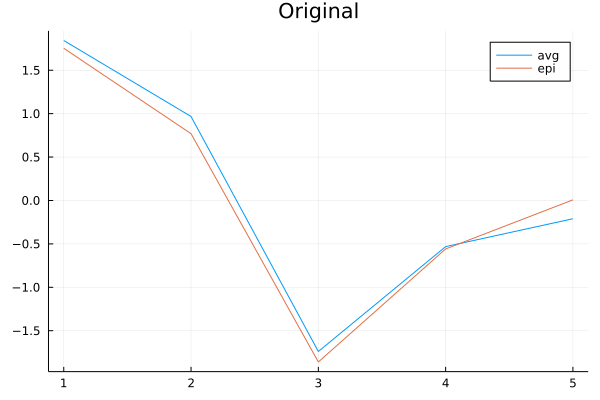

In [ ]:
@time begin
plot(average, label = "avg")
plot!(Epsilon, label = "epi", title = "Original")
end

# Change W to a T-Distribution

In [ ]:
Epsilon

1-element Vector{Vector{Float64}}:
 [1.7529931428928995, 0.7691906740560805, -1.8602116721113333, -0.5582234335897972, 0.007380485591805917]

In [ ]:
@time begin
k_2 = simulate_wi_t(5, 10000, 3)
end

  0.007583 seconds (10.00 k allocations: 1.297 MiB)


10000-element Vector{Vector{Float64}}:
 [-1.3581240339884117, 0.9927085024690411, 1.0957990087110332, 0.11606984303090266, 0.8037489299683396]
 [0.6184216482766802, -0.6777359751868, -1.4326435836293867, -0.8996354995085385, -5.074565771960233]
 [0.10533341364609995, 0.4360707867134457, 0.49538278542987535, -0.324461441581723, -12.370685156577247]
 [-0.20114976260977482, 0.04979510194193596, -2.0975293297473523, 0.03309081719641416, 1.9830511306465037]
 [-0.5966316854143813, 0.6039338011212975, -0.4077873099858032, 0.8511782286404675, -1.1460681204706769]
 [4.108768017898066, 0.2183913629677853, -0.34212233536446973, 1.0603812253246825, -0.5910305556871654]
 [2.3595051365405153, 0.5655119184495729, -0.07031368682769613, 0.6204286536196478, 3.7672922524564805]
 [0.02509572117455686, 0.04030982041925669, -1.1513897016954622, 0.8378906698704657, 0.4977798539260203]
 [0.12271277562674435, -1.6275466900470286, 0.9742405950681212, -3.6248498564834426, -2.562518966115174]
 [1.712909978622456,

In [ ]:
@time begin
x_bar2 = Sum(k_2, Epsilon)
end

  0.005047 seconds (50.01 k allocations: 3.913 MiB)


10000-element Vector{Any}:
 [0.3948691089044878, 1.7618991765251217, -0.7644126634003001, -0.4421535905588945, 0.8111294155601455]
 [2.3714147911695798, 0.09145469886928059, -3.29285525574072, -1.4578589330983358, -5.067185286368427]
 [1.8583265565389995, 1.2052614607695262, -1.364828886681458, -0.8826848751715202, -12.36330467098544]
 [1.5518433802831246, 0.8189857759980165, -3.9577410018586856, -0.525132616393383, 1.9904316162383096]
 [1.1563614574785182, 1.3731244751773781, -2.2679989820971365, 0.29295479505067035, -1.138687634878871]
 [5.861761160790965, 0.9875820370238658, -2.202334007475803, 0.5021577917348853, -0.5836500700953595]
 [4.112498279433415, 1.3347025925056535, -1.9305253589390294, 0.06220522002985063, 3.7746727380482863]
 [1.7780888640674564, 0.8095004944753372, -3.0116013738067955, 0.2796672362806685, 0.5051603395178262]
 [1.8757059185196439, -0.858356015990948, -0.8859710770432121, -4.1830732900732395, -2.555138480523368]
 [3.4659031215153555, 1.105763273168666, -2.

In [ ]:
@time begin
average_2 = [mean(x_bar2)]
end

  0.002878 seconds (20.00 k allocations: 1.374 MiB)


1-element Vector{Vector{Float64}}:
 [1.7645439262560922, 0.7642745539048816, -1.8463237104657118, -0.5732863762667882, -0.014384646834276097]

  0.001617 seconds (2.10 k allocations: 121.359 KiB)


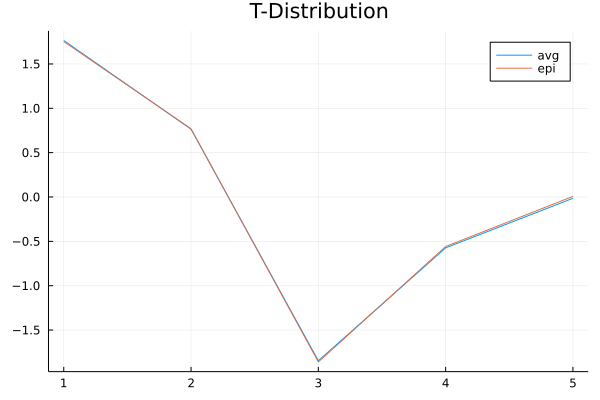

In [ ]:
@time begin
plot(average_2, label = "avg")
plot!(Epsilon, label = "epi", title = "T-Distribution")
end

T distribution with degree of freedom 2

In [ ]:
@time begin
k_3 = simulate_wi_t(5, 10000, 2)
end

  0.002816 seconds (10.00 k allocations: 1.297 MiB)


10000-element Vector{Vector{Float64}}:
 [1.5591648274293965, -3.278017486899831, 0.35030249629853, -1.1879274251776788, 0.5750733247870291]
 [0.4525632465442984, -2.6393983845701485, 0.3162970375384258, 0.40192945051602647, -4.889396194771193]
 [-1.401465966905319, -0.15211484193490224, 0.49642746389849346, 0.09179339242617258, -0.9741734575617245]
 [0.6431547580606883, 3.114097035948154, -0.4485693958109269, 1.8501797433683551, 1.3134950495556954]
 [0.1555845132025965, 0.49183065220586397, -1.8128280402771497, 1.8823529388107072, -0.27821160805470924]
 [-0.13886604473745856, 0.39228477330801165, 2.378252519201411, 0.34500436738509616, 0.18953195914033874]
 [0.6167184770144932, -1.035476923897591, 0.20897562554047705, -1.1568070961865287, -3.6765468691446066]
 [-0.8877152396187946, -5.6050488172272415, -2.6305597854338014, -0.7035368843629275, 1.8100990272266235]
 [-0.21022614923044292, 1.1726960464339298, -3.9717721598776925, 0.5533476011158908, 1.2365906477501893]
 [-0.15926931904070

In [ ]:
@time begin
x_bar3 = Sum(k_3, Epsilon)
end

  0.004361 seconds (50.01 k allocations: 3.913 MiB)


10000-element Vector{Any}:
 [3.3121579703222963, -2.5088268128437505, -1.5099091758128034, -1.7461508587674759, 0.582453810378835]
 [2.205556389437198, -1.870207710514068, -1.5439146345729076, -0.15629398307377074, -4.882015709179386]
 [0.35152717598758043, 0.6170758321211783, -1.3637842082128397, -0.46643004116362463, -0.9667929719699185]
 [2.3961479009535878, 3.8832877100042342, -2.3087810679222605, 1.2919563097785578, 1.3208755351475012]
 [1.9085776560954961, 1.2610213262619445, -3.673039712388483, 1.32412950522091, -0.2708311224629033]
 [1.614127098155441, 1.1614754473640923, 0.5180408470900777, -0.21321906620470105, 0.19691244473214467]
 [2.3697116199073927, -0.2662862498415104, -1.6512360465708562, -1.715030529776326, -3.669166383552801]
 [0.8652779032741049, -4.835858143171161, -4.490771457545135, -1.2617603179527248, 1.8174795128184293]
 [1.5427669936624566, 1.9418867204900103, -5.831983831989026, -0.0048758324739064385, 1.2439711333419952]
 [1.5937238238521896, 1.2141311125449

In [ ]:
@time begin
average_3 = [mean(x_bar3)]
end

  0.004859 seconds (20.00 k allocations: 1.374 MiB)


1-element Vector{Vector{Float64}}:
 [1.6944398232733002, 0.7634429124100267, -1.88885245080816, -0.5849892376381278, 0.03290172356851986]

  0.001610 seconds (2.10 k allocations: 121.359 KiB)


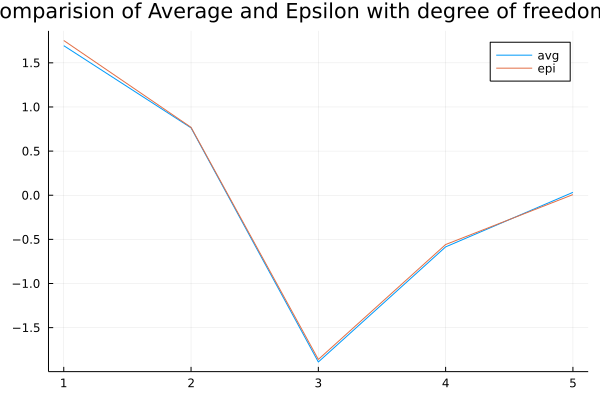

In [ ]:
@time begin
plot(average_3, label = "avg")
plot!(Epsilon, label = "epi", title = "Comparision of Average and Epsilon with degree of freedom is 2")
end

T distribution with degree of freedom 1

In [ ]:
@time begin
k_4 = simulate_wi_t(5, 10000, 1)
end

  0.008188 seconds (10.00 k allocations: 1.297 MiB)


10000-element Vector{Vector{Float64}}:
 [-1.1407395768426518, 0.318181952313409, 0.6418282747818513, -0.407388785190773, 0.311565715302024]
 [0.48925765337870813, 935.8314924192783, 0.2691616439811117, 0.28998646923413657, -1.873933212051614]
 [0.0628501480638283, -1.513285137405669, 1.304189758931343, -1.415099946030787, -5.652570806337246]
 [4.745794350276648, -0.49546872260357194, -0.6046513750145791, -1.5070629138859541, 0.6205208677632771]
 [0.21877014827392263, 1.7723058585834293, 1.1259458770127888, -0.2148831849408425, 0.26642169324025133]
 [9.284300383411749, 0.5314232006619521, -7.804449886159202, -1.1060303507868527, 0.209743097493831]
 [-0.6134576479784009, -21.49900158371631, -0.31599321017165966, 2.9453944983784544, -0.4468814074490034]
 [0.4595089926328173, 0.00879327181035243, -0.2150452899335151, 0.3992817891489141, 0.85787362503637]
 [5.094417389527469, 1.8191966625538218, -0.07946661373466883, 0.07272209334539985, 1.2066023852475194]
 [0.8413961132897132, -2.57988140

In [ ]:
@time begin
x_bar4 = Sum(k_4, Epsilon)
end

  0.006391 seconds (50.01 k allocations: 3.913 MiB)


10000-element Vector{Any}:
 [0.6122535660502477, 1.0873726263694896, -1.218383397329482, -0.9656122187805702, 0.3189462008938299]
 [2.2422507962716076, 936.6006830933344, -1.5910500281302216, -0.26823696435566063, -1.866552726459808]
 [1.815843290956728, -0.7440944633495885, -0.5560219131799904, -1.973323379620584, -5.6451903207454395]
 [6.498787493169547, 0.2737219514525086, -2.4648630471259123, -2.0652863474757512, 0.627901353355083]
 [1.9717632911668221, 2.54149653263951, -0.7342657950985445, -0.7731066185306397, 0.27380217883205726]
 [11.037293526304648, 1.3006138747180327, -9.664661558270534, -1.6642537843766498, 0.21712358308563692]
 [1.1395354949144987, -20.72981090966023, -2.176204882282993, 2.387171064788657, -0.43950092185719747]
 [2.2125021355257166, 0.7779839458664329, -2.075256962044848, -0.1589416444408831, 0.8652541106281759]
 [6.847410532420368, 2.5883873366099026, -1.9396782858460022, -0.48550134024439734, 1.2139828708393252]
 [2.5943892561826125, -1.810690734799447, -

In [ ]:
@time begin
average_4 = [mean(x_bar4)]
end

  0.002851 seconds (20.00 k allocations: 1.374 MiB)


1-element Vector{Vector{Float64}}:
 [-0.05423007105175584, 1.2557837964927705, -2.720988752746481, 0.28851526397290433, 2.32161927586218]

  0.001546 seconds (2.10 k allocations: 121.359 KiB)


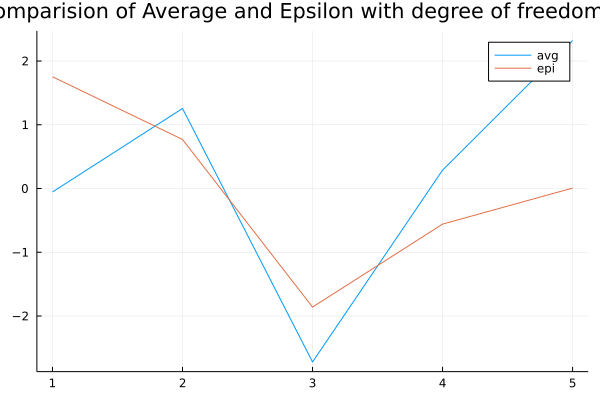

In [ ]:
@time begin
plot(average_4, label = "avg")
plot!(Epsilon, label = "epi", title = "Comparision of Average and Epsilon with degree of freedom is 1")
end

# Experimentation

## Standard gaussian wi with mean = 0 and SD = 1

In [ ]:
@time begin
 exp_wi = simulate_wi(5, 100, 0 , 1)
 exp_x_bar = Sum(exp_wi, Epsilon)
 exp_average = [mean(exp_x_bar)]
end

  0.000114 seconds (811 allocations: 67.375 KiB)


1-element Vector{Vector{Float64}}:
 [1.8018647456325254, 0.6924444583409765, -2.077044821492561, -0.4448291711090661, -0.11052750580987215]

In [ ]:
@time begin
 exp_wi_2 = simulate_wi(5, 1000, 0 , 1)
 exp_x_bar_2 = Sum(exp_wi_2, Epsilon)
 exp_average_2 = [mean(exp_x_bar_2)]
end

  0.000557 seconds (8.02 k allocations: 665.203 KiB)


1-element Vector{Vector{Float64}}:
 [1.7820579289421874, 0.7923802838114721, -1.8458205265046157, -0.5470130797810643, -0.01909014682106299]

In [ ]:
@time begin
 exp_wi_3 = simulate_wi(5, 10000, 0 , 1)
 exp_x_bar_3 = Sum(exp_wi_3, Epsilon)
 exp_average_3 = [mean(exp_x_bar_3)]
end

  0.005771 seconds (80.02 k allocations: 6.583 MiB)


1-element Vector{Vector{Float64}}:
 [1.7371589702226724, 0.7778923781563764, -1.8738974322728326, -0.5603971411016652, -0.0011101747482199218]

In [ ]:
@time begin
 exp_wi_4 = simulate_wi(5, 100000, 0 , 1)
 exp_x_bar_4 = Sum(exp_wi_4, Epsilon)
 exp_average_4 = [mean(exp_x_bar_4)]
end

  0.099189 seconds (800.02 k allocations: 65.325 MiB, 34.95% gc time)


1-element Vector{Vector{Float64}}:
 [1.7536526315089127, 0.7656921721531282, -1.860646705075109, -0.5589228637143234, 0.0038087147498445007]

In [ ]:
@time begin
 exp_wi_5 = simulate_wi(5, 1000000, 0 , 1)
 exp_x_bar_5 = Sum(exp_wi_5, Epsilon)
 exp_average_5 = [mean(exp_x_bar_5)]
end

  1.546192 seconds (8.00 M allocations: 642.241 MiB, 40.08% gc time)


1-element Vector{Vector{Float64}}:
 [1.7541360520850686, 0.7693119958856558, -1.85698351111243, -0.5579231266727667, 0.007753944462871294]

  0.023713 seconds (16.89 k allocations: 1015.922 KiB, 84.40% compilation time)


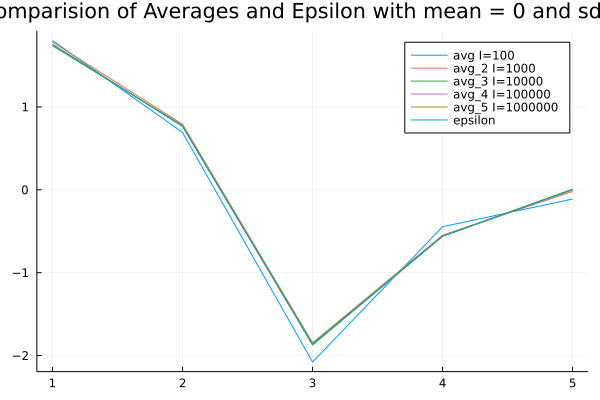

In [ ]:
@time begin
plot(exp_average ,label = "avg I=100")
plot!(exp_average_2 ,label = "avg_2 I=1000")
plot!(exp_average_3 ,label = "avg_3 I=10000")
plot!(exp_average_4 ,label = "avg_4 I=100000")
plot!(exp_average_5 ,label = "avg_5 I=1000000")
plot!(Epsilon, label = "epsilon", title = "Comparision of Averages and Epsilon with mean = 0 and sd = 1")
end

## Standard T Distribution wi mean = 0 and sd = 10

In [ ]:
@time begin
 exp_wi = simulate_wi(5, 100, 0 , 10)
 exp_x_bar = Sum(exp_wi, Epsilon)
 exp_average = [mean(exp_x_bar)]
end

  0.000272 seconds (811 allocations: 67.375 KiB)


1-element Vector{Vector{Float64}}:
 [0.6605850868039392, 1.1831837675125194, -2.974263457109649, -1.4076667799905571, 2.4316083265384782]

In [ ]:
@time begin
 exp_wi_2 = simulate_wi(5, 1000, 0 , 10)
 exp_x_bar_2 = Sum(exp_wi_2, Epsilon)
 exp_average_2 = [mean(exp_x_bar_2)]
end

  0.001206 seconds (8.02 k allocations: 665.203 KiB)


1-element Vector{Vector{Float64}}:
 [1.6705535830636609, 0.620741753478899, -1.8272168014604406, -0.4668552555364754, 0.08918692478859348]

In [ ]:
@time begin
 exp_wi_3 = simulate_wi(5, 10000, 0 , 10)
 exp_x_bar_3 = Sum(exp_wi_3, Epsilon)
 exp_average_3 = [mean(exp_x_bar_3)]
end

  0.013040 seconds (80.02 k allocations: 6.583 MiB)


1-element Vector{Vector{Float64}}:
 [1.459728586858448, 0.9324804359852941, -1.8301429954267985, -0.5093423582026818, -0.12836748218480135]

In [ ]:
@time begin
 exp_wi_4 = simulate_wi(5, 100000, 0 , 10)
 exp_x_bar_4 = Sum(exp_wi_4, Epsilon)
 exp_average_4 = [mean(exp_x_bar_4)]
end

  0.098684 seconds (800.02 k allocations: 65.325 MiB)


1-element Vector{Vector{Float64}}:
 [1.740580947417261, 0.7363890962760891, -1.8480035862663005, -0.5397044206558107, 0.007141276997748555]

In [ ]:
@time begin
 exp_wi_5 = simulate_wi(5, 1000000, 0 , 10)
 exp_x_bar_5 = Sum(exp_wi_5, Epsilon)
 exp_average_5 = [mean(exp_x_bar_5)]
end

  1.310413 seconds (8.00 M allocations: 642.241 MiB, 20.89% gc time)


1-element Vector{Vector{Float64}}:
 [1.7478706166387024, 0.7523746592290251, -1.8530165629742847, -0.571136164658797, -0.0006821491132618994]

  0.003489 seconds (6.04 k allocations: 316.484 KiB)


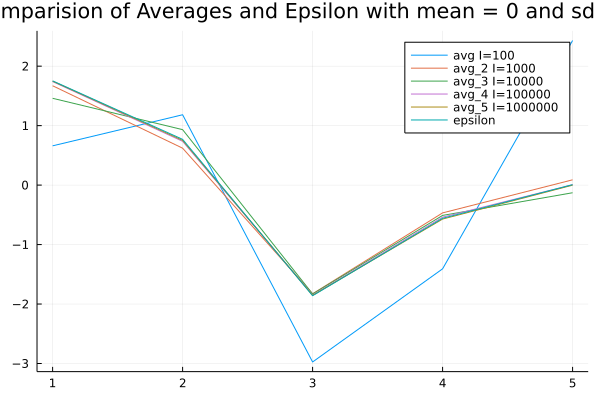

In [ ]:
@time begin
plot(exp_average ,label = "avg I=100")
plot!(exp_average_2 ,label = "avg_2 I=1000")
plot!(exp_average_3 ,label = "avg_3 I=10000")
plot!(exp_average_4 ,label = "avg_4 I=100000")
plot!(exp_average_5 ,label = "avg_5 I=1000000")
plot!(Epsilon, label = "epsilon", title = "Comparision of Averages and Epsilon with mean = 0 and sd = 10")
end

## Standard T Distribution wi

In [ ]:
@time begin
 exp_wiT = simulate_wi_t(5,100000,1) 
 exp_x_barT = Sum(exp_wiT, Epsilon)
 exp_averageT = [mean(exp_x_barT)]
end

  0.210712 seconds (800.02 k allocations: 65.325 MiB)


1-element Vector{Vector{Float64}}:
 [0.9032976702819374, -7.851642731886265, -1.8121505697196967, -0.9503751241081562, -1.4217479932514823]

In [ ]:
@time begin
 exp_wiT_2 = simulate_wi_t(5,100000,2) 
 exp_x_barT_2 = Sum(exp_wiT_2, Epsilon)
 exp_averageT_2 = [mean(exp_x_barT_2)]
end

  0.573817 seconds (800.02 k allocations: 65.325 MiB, 85.27% gc time)


1-element Vector{Vector{Float64}}:
 [1.7464655803870874, 0.7737422613844073, -1.870954901464851, -0.5630700081921599, 0.016180941483299797]

In [ ]:
@time begin
 exp_wiT_3 = simulate_wi_t(5,100000,3) 
 exp_x_barT_3 = Sum(exp_wiT_3, Epsilon)
 exp_averageT_3 = [mean(exp_x_barT_3)]
end

  0.104519 seconds (800.02 k allocations: 65.325 MiB)


1-element Vector{Vector{Float64}}:
 [1.750163519470984, 0.7684614655420438, -1.8636331998305338, -0.5583928571068503, 0.006742444328585057]

  0.002109 seconds (4.05 k allocations: 218.469 KiB)


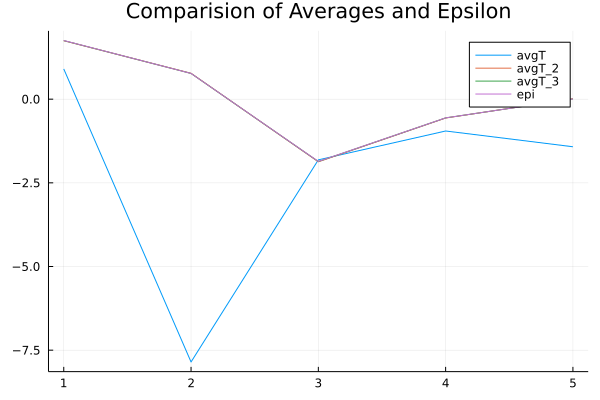

In [ ]:
@time begin
plot(exp_averageT ,label = "avgT")
plot!(exp_averageT_2 ,label = "avgT_2")
plot!(exp_averageT_3 ,label = "avgT_3")
plot!(Epsilon, label = "epi", title="Comparision of Averages and Epsilon")
end

## VAR

In [ ]:
function VAR(i,t)
  for t in 1:t
    for i in 1:i
      C = Matrix(I,)
      A = Diagonal(i)
